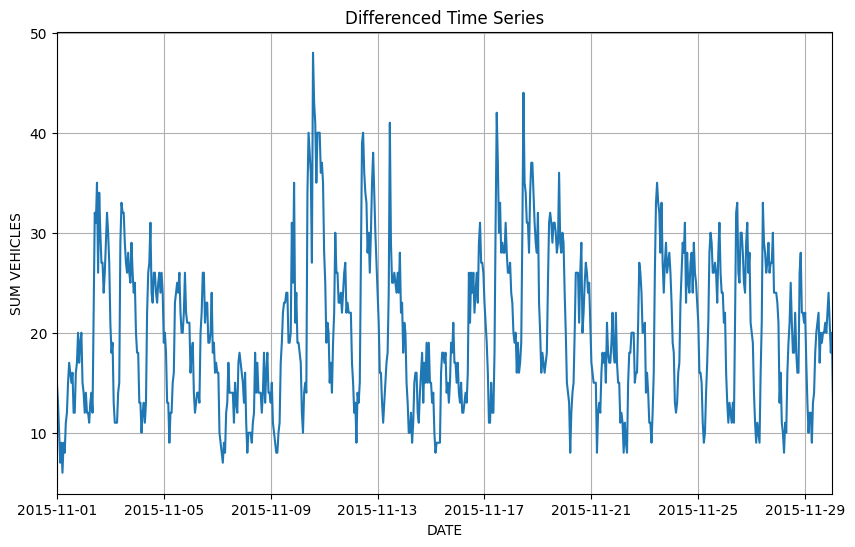

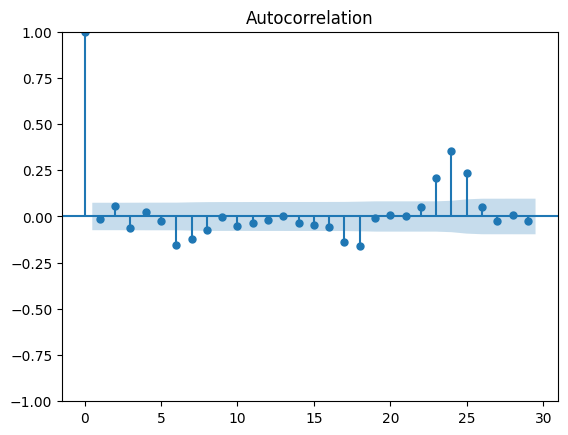

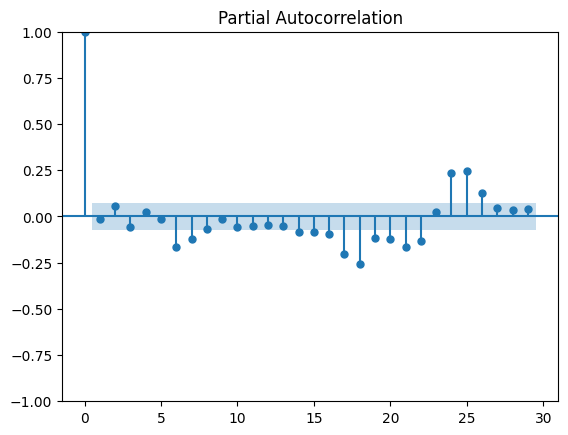

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

ValueError: too many values to unpack (expected 2)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('./data/sample2.csv', parse_dates=['Timestamp'], index_col='Timestamp')

#visualisasi
# plt.figure(figsize=(10,6))
# sns.lineplot(x='DateTime', y='Vehicles', data=df)
# plt.title('Line Chart Time Series')
# plt.xlabel('DATE')
# plt.ylabel('SUM VEHICLES')

# plt.xlim(pd.Timestamp('2015-11-01'), pd.Timestamp('2015-11-30'))
# plt.grid(True)
# plt.show()

#differencing
df_diff = df.diff().dropna()
#visualisasi after diff
plt.figure(figsize=(10,6))
sns.lineplot(x='Timestamp', y='Vehicles', data=df)
plt.title('Differenced Time Series')
plt.xlabel('DATE')
plt.ylabel('SUM VEHICLES')

plt.xlim(pd.Timestamp('2015-11-01'), pd.Timestamp('2015-11-30'))
plt.grid(True)
plt.show()

#pengaturan parameter
# ACF & PACF plots
plot_acf(df_diff['Vehicles'])
plt.show()

plot_pacf(df_diff['Vehicles'])
plt.show()

# Choose model order ARIMA (p, d, q)
p = 1  # order AR FROM PACF
d = 1  # deg differencing
q = 1  # order MA fROM ACF
order = (p, d, q)

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Training model
model = ARIMA(train['Vehicles'], order=order)
fitted_model = model.fit()

# Evaluation
forecast, conf_int= fitted_model.forecast(len(test), alpha=0.05)

# Output visual
plt.plot(train['Vehicles'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.05, label='Confidence Interval')
plt.legend()
plt.show()


# Evaluation performance
mse = mean_squared_error(test['Vehicles'], pd.Series(forecast))
rmse = np.sqrt(mse)